## Background: 
Data Afrique is an App development company that builds Android and IOS apps and make them available in the Google Play and App Store. The Apps are always free and hence a big source of revenue would be driven by the app usage and ads placement. Our task is to extract data-driven insights from data that will help the business grow. Good insights are actionable and make business sense.

## Objective: 
To analyze the data to find out what type of apps attract more users. To extract actionable insights that will drive business growth. 

## Dataset
As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play. ([Statista](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/))

A [dataset containing data](https://www.kaggle.com/lava18/google-play-store-apps) about approximately 10,000 Android apps from Google Play; the data was collected in August 2018.  
A [dataset containing data](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. 


## Key Questions:
1. What are the different variables that influence downloads?
2. What is the most popular genre in the Google Play store and the App Store respectively?
3. What is the average user rating of the most downloaded apps?
4. How many downloads constitutes good?
5. What are the recommendations to the company?

## Data Description:
IOS Data:
* "id" : App ID
* "track_name": App Name
* "size_bytes": Size (in Bytes)
* "currency": Currency Type
* "price": Price amount
* "ratingcounttot": User Rating counts (for all version)
* "ratingcountver": User Rating counts (for current version)
* "user_rating" : Average User Rating value (for all version)
* "userratingver": Average User Rating value (for current version)
* "ver" : Latest version code
* "cont_rating": Content Rating
* "prime_genre": Primary Genre
* "sup_devices.num": Number of supporting devices
* "ipadSc_urls.num": Number of screenshots showed for display
* "lang.num": Number of supported languages
* "vpp_lic": Vpp Device Based Licensing Enabled

Android Data:
* App  : App name
* Category  :
* Rating  : Average User Rating value (for all version)
* Reviews  : Average User Rating value (for all version)
* Size  : Size (in Bytes)
* Installs : Total number of downloads 
* Type  
* Price  
* Content Rating  
* Genres  
* Last Updated  
* Current Ver  
* Android Ver  

In [30]:
# Library Import Cell: import all libraries in one cell
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Data Import Cell: import all data in one cell
opened_file_ios = open('AppleStore.csv', encoding="utf8")
opened_file_and = open('googleplaystore.csv', encoding="utf8")


In [3]:
from csv import reader
read_file_ios = reader(opened_file_ios)
read_file_and = reader(opened_file_and)

ios_apps_data = list(read_file_ios)
and_apps_data = list (read_file_and)

# Pandas
ios = pd.read_csv('AppleStore.csv')
android = pd.read_csv('googleplaystore.csv')

In [4]:
# The explore_data() function does the following:
# * Takes in four parameters: i) dataset, which will be a list of lists, ii) start and end, which will both be integers and represent the starting and the ending indices of a slice from the dataset, iii) rows_and_columns, which will be a Boolean and has False as a default argument
# * Slices the dataset using dataset[start:end]
# * Loops through the slice, and for each iteration, prints a row and adds a new line after that row using print('\n')
# * Prints the number of rows and columns if rows_and_columns is True

def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

# DATA CLEANING

In [5]:
explore_data(ios_apps_data, 0, 5, True ) # Without Pandas
display(ios.info())

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


Number of rows: 7198
Number of columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  -----

None

We have 7197 iOS apps in this data set, and the columns that seem interesting are:  
'track_name',   
'currency',   
'price',   
'rating_count_tot',   
'rating_count_ver', and   
'prime_genre'. 

In [6]:
explore_data(and_apps_data, 0, 5, True )
display(android.info())

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 10842
Number of columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 

None

We see that the Google Play data set has 10841 apps and 13 columns. At a quick glance, the columns that might be useful for the purpose of our analysis are:  
'App',  
'Category',   
'Reviews',   
'Installs',   
'Type',   
'Price', and   
'Genres'.

In [7]:
#Duplicate Apps: Review the data set to see if there are duplicated records
# Method 1 : loop through the data set and compare names of apps to a "Unique apps" list and if already in list, then add to the "duplicated apps" list
duplicate_apps = []
unique_apps = []

for apps in and_apps_data:
    name = apps[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print(len(duplicate_apps))
print(len(unique_apps))

# Method 2: use Pandas to identify number of duplicated apps 
display(android[android.duplicated(subset=['App'])]['App'].count())
android.drop_duplicates(subset="App")['App'].count()

1181
9661


1181

9660

In the android data set we can see that there are about 1181 duplicated apps and 9660 unique apps

Originally when the below code was run, we ran into a problem and got the following error:  
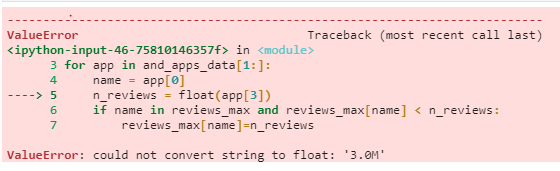  

upon investigation with pandas we realized that the row looks off and from the discussion section of the data set we realized that this is caused by a missing value in the 'category' section that has caused the data to move to the left and assigning wrong values to the 'reviews' section (Max rating on the Play store should be 5)  
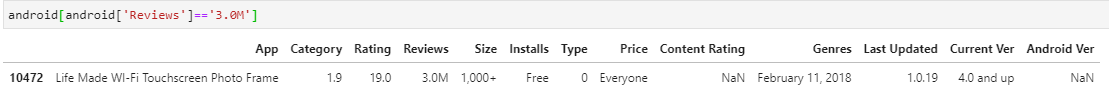  

To solve the problem we delete that row and run the code again. 

In [14]:
# dont run this more than once
# Method 1 ; no Pandas 
del and_apps_data[10472] 

# Method 2: Pandas
# android = android.drop(labels=10472, axis=0)

Since we dont want to keep all copies of duplicated Extracting the maximum reviews for each duplicate app
We loop through all the data and compare the reviews with the maximum identified reviews. 
Now, let's use the reviews_max dictionary to remove the duplicates. 

In [42]:
reviews_max={}
count = 0
for app in and_apps_data[1:]:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name]=n_reviews
    elif name not in reviews_max:
        reviews_max[name]=n_reviews

print('Expected length:', len(and_apps_data) - 1181)
print('Actual length:', len(reviews_max))  

android.head()

Expected length: 9658
Actual length: 9658


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Removing duplicate rows
The codes below we remove the duplicate data by comparing the "Reviews" of each app (app[3]) with the max review of the duplicate app. We subsequently take all apps that match the max reviews and store them in "android_clean".

For the duplicate cases, we'll only keep the entries with the highest number of reviews. In the code cell below:

We start by initializing two empty lists, android_clean and already_added.
We loop through the android data set, and for every iteration:
We isolate the name of the app and the number of reviews.
We add the current row (app) to the android_clean list, and the app name (name) to the already_added list if:
The number of reviews of the current app matches the number of reviews of that app as described in the reviews_max dictionary; and
The name of the app is not already in the already_added list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for reviews_max[name] == n_reviews, we'll still end up with duplicate entries for some apps.

In [47]:
android_clean = []
already_added = []

for app in and_apps_data[1:]:
    name=app[0]
    n_reviews = float(app[3])
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)
        
print(len(android_clean))
#explore_data(android_clean, 0, 5,True)
android_df_clean = pd.DataFrame(android.drop_duplicates(subset="App"))
android_df_clean.shape

9658


(9659, 13)

In [45]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9658
Number of columns: 13


### Removing non-English Apps

The english characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.

The function below uses the built-in ord() function to find out the corresponding encoding number of each character.

In [21]:
# Define a function that identifies non english names for apps.
# Since the en
def english(string):
    count=0
    for character in string:
        if ord(character)>127:
            count+=1
    if count >3:
        return False
    else:
        return True

print(english('instagram 爱奇艺'))
print(english('爱奇艺PPS -《欢乐颂2》电视剧热播a'))
print(english('Docs To Go™ Free Office Suite'))
print(english('Instachat 😜爱奇'))

True
False
True
True


In [71]:
#Android Data Set - Removing the non english apps
android_english_apps = []
ios_english_apps = []
for app in android_clean:
    name = app[0]
    if english(name):
        android_english_apps.append(app)

for app in ios_apps_data:
    name=app[1]
    if english(name):
        ios_english_apps.append(app)
        
explore_data(android_english_apps, 0 , 5, True )
print('\n')
explore_data(ios_english_apps, 0, 5, True)

# using Pandas
android_df_english = android_df_clean[android_df_clean['App'].apply(english)]
ios_df_english = ios[ios['track_name'].apply(english)]

print('\n')
print("** Pandas Method:")
print('\n')
display(android_df_english.head())
display(android_df_english.shape)
display(ios_df_english.head())
display(ios_df_english.shape)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


['Paper flowers instructions', 'ART_AND_DESIGN', '4.4', '167', '5.6M', '50,000+', 'Free', '0', 'Everyone', 'Art & Design', 'March 26, 2017', '1.0', '2.3 and up']


Number of rows: 9613
Number of columns: 13


['id', 'track_name', 'size_bytes', 'currency',

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


(9614, 13)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


(6183, 16)

## Isolating Free Apps

As we stand:
Python variables:  
android_english_apps  
ios_english_apps  

Pandas Variables:  
android_df_english (9614, 13)  
ios_df_english (6183, 16)

As we only build free apps, one of our main objectives is to compare and analyze only free apps.

In [72]:
free_eng_and_app = []
free_eng_ios_app = []
for app in android_english_apps:
    price= app[7]
    if price == '0':
        free_eng_and_app.append(app)
        
for app in ios_english_apps:
    price=app[4]
    if price == '0.0':
        free_eng_ios_app.append(app)
        
print(len(free_eng_and_app))
print(len(free_eng_ios_app))
    

8863
3222


In [81]:
# Using Pandas:
android_df_english_free = android_df_english[android_df_english['Price']=='0']
ios_df_english_free = ios_df_english[ios_df_english['price']==0]
print(android_df_english_free.shape)
ios_df_english_free.shape

(8862, 13)


(3222, 16)

# Part 3 - Analysis
The end goal of app development is to develop app that would be appealing to both the play market and the Apple market. 

Steps to validation:
- generate a minimal android version of the app
- If the app is well received on the Android market, we will invest more into developing a full version of the app 
- If app is profitable for 6 months, then we will make an IOS version

## Most common app by genre

In [91]:
def freq_table(dataset, index):
    table ={}
    total = 0
    
    for row in dataset:
        total += 1
        column = row[index]
        if column in table:  
            table[column] += 1
           
        else:
            table[column] = 1
            
    table_percentages = {}
    for key in table:
        percentage = (table[key]/total)*100
        table_percentages[key] = percentage
    return table_percentages


In [92]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

## Android

In [108]:
display_table(free_eng_and_app,1)

FAMILY : 18.910075595170937
GAME : 9.725826469592688
TOOLS : 8.462146000225657
BUSINESS : 4.592124562789123
LIFESTYLE : 3.9038700214374367
PRODUCTIVITY : 3.8925871601038025
FINANCE : 3.7007785174320205
MEDICAL : 3.5315355974275078
SPORTS : 3.396141261423897
PERSONALIZATION : 3.3058783707548236
COMMUNICATION : 3.2381812027530184
HEALTH_AND_FITNESS : 3.0802211440821394
PHOTOGRAPHY : 2.944826808078529
NEWS_AND_MAGAZINES : 2.798149610741284
SOCIAL : 2.6627552747376737
TRAVEL_AND_LOCAL : 2.335552296062281
SHOPPING : 2.245289405393208
BOOKS_AND_REFERENCE : 2.1437436533904997
DATING : 1.8616721200496444
VIDEO_PLAYERS : 1.7939749520478394
MAPS_AND_NAVIGATION : 1.399074805370642
FOOD_AND_DRINK : 1.241114746699763
EDUCATION : 1.1621347173643235
ENTERTAINMENT : 0.9590432133589079
LIBRARIES_AND_DEMO : 0.9364774906916393
AUTO_AND_VEHICLES : 0.9251946293580051
HOUSE_AND_HOME : 0.8236488773552973
WEATHER : 0.8010831546880289
EVENTS : 0.7108202640189552
PARENTING : 0.6544059573507841
ART_AND_DESIGN : 

In [103]:
# Using Pandas
android_df_english_free.head()
((android_df_english_free.groupby('Category')['Category'].count() / android_df_english_free.shape[0])*100).sort_values(ascending=False)

Category
FAMILY                 18.449560
GAME                    9.873618
TOOLS                   8.440533
BUSINESS                4.592643
LIFESTYLE               3.904311
PRODUCTIVITY            3.893026
FINANCE                 3.701196
MEDICAL                 3.520650
SPORTS                  3.396524
PERSONALIZATION         3.317536
COMMUNICATION           3.238547
HEALTH_AND_FITNESS      3.080569
PHOTOGRAPHY             2.945159
NEWS_AND_MAGAZINES      2.798465
SOCIAL                  2.663056
TRAVEL_AND_LOCAL        2.335816
SHOPPING                2.245543
BOOKS_AND_REFERENCE     2.143986
DATING                  1.861882
VIDEO_PLAYERS           1.782893
MAPS_AND_NAVIGATION     1.399233
EDUCATION               1.286391
FOOD_AND_DRINK          1.241255
ENTERTAINMENT           1.128413
LIBRARIES_AND_DEMO      0.936583
AUTO_AND_VEHICLES       0.925299
HOUSE_AND_HOME          0.835026
WEATHER                 0.801174
EVENTS                  0.710900
ART_AND_DESIGN          0.677048
P


The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

## IOS

In [107]:
display_table(free_eng_ios_app,11)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


In [106]:
#using Pandas
((ios_df_english_free.groupby('prime_genre')['prime_genre'].count() / ios_df_english_free.shape[0])*100).sort_values(ascending=False)

prime_genre
Games                58.162632
Entertainment         7.883302
Photo & Video         4.965860
Education             3.662322
Social Networking     3.289882
Shopping              2.607076
Utilities             2.513966
Sports                2.141527
Music                 2.048417
Health & Fitness      2.017381
Productivity          1.738051
Lifestyle             1.582868
News                  1.334575
Travel                1.241465
Finance               1.117318
Weather               0.869025
Food & Drink          0.806952
Reference             0.558659
Business              0.527623
Book                  0.434513
Medical               0.186220
Navigation            0.186220
Catalogs              0.124146
Name: prime_genre, dtype: float64


We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.


Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users

# Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [94]:
genres_ios = freq_table(free_eng_ios_app, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in free_eng_ios_app:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


In [112]:
ios_df_english_free.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [116]:
ios_rating = ios_df_english_free.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False)
print(ios_rating)

prime_genre
Navigation           86090.333333
Reference            74942.111111
Social Networking    71548.349057
Music                57326.530303
Weather              52279.892857
Book                 39758.500000
Food & Drink         33333.923077
Finance              31467.944444
Photo & Video        28441.543750
Travel               28243.800000
Shopping             26919.690476
Health & Fitness     23298.015385
Sports               23008.898551
Games                22788.669691
News                 21248.023256
Productivity         21028.410714
Utilities            18684.456790
Lifestyle            16485.764706
Entertainment        14029.830709
Business              7491.117647
Education             7003.983051
Catalogs              4004.000000
Medical                612.000000
Name: rating_count_tot, dtype: float64


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [121]:
ios_df_english_free[ios_df_english_free['prime_genre']=='Navigation']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
49,323229106,"Waze - GPS Navigation, Maps & Real-time Traffic",94139392,USD,0.0,345046,3040,4.5,4.5,4.24,4+,Navigation,37,5,36,1
130,585027354,Google Maps - Navigation & Transit,120232960,USD,0.0,154911,1253,4.5,4.0,4.31.1,12+,Navigation,37,5,34,1
881,329541503,Geocaching®,108166144,USD,0.0,12811,134,3.5,1.5,5.3,4+,Navigation,37,0,22,1
1633,504677517,CoPilot GPS – Car Navigation & Offline Maps,82534400,USD,0.0,3582,70,4.0,3.5,10.0.0.984,4+,Navigation,38,5,25,1
3987,344176018,ImmobilienScout24: Real Estate Search in Germany,126867456,USD,0.0,187,0,3.5,0.0,9.5,4+,Navigation,37,5,3,1
6033,463431091,Railway Route Search,46950400,USD,0.0,5,0,3.0,0.0,3.17.1,4+,Navigation,37,0,1,1


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

In [123]:
ios_df_english_free[ios_df_english_free['prime_genre']=='Reference']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
90,308750436,Dictionary.com Dictionary & Thesaurus,111275008,USD,0.0,200047,177,4.0,4.0,7.1.3,4+,Reference,37,0,1,1
335,364740856,Dictionary.com Dictionary & Thesaurus for iPad,165748736,USD,0.0,54175,10176,4.5,4.5,4.0,4+,Reference,24,5,9,1
551,414706506,Google Translate,65281024,USD,0.0,26786,27,3.5,4.5,5.10.0,4+,Reference,37,5,59,1
715,388389451,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",100551680,USD,0.0,18418,706,4.5,5.0,9.2.1,4+,Reference,37,5,16,1
738,1130829481,New Furniture Mods - Pocket Wiki & Game Tools ...,52959232,USD,0.0,17588,17588,4.5,4.5,1.0,4+,Reference,38,3,2,1
757,399452287,Merriam-Webster Dictionary,155593728,USD,0.0,16849,1125,4.5,4.5,4.1,4+,Reference,38,1,12,1
913,475772902,Night Sky,596499456,USD,0.0,12122,60,4.5,4.5,4.4.1,4+,Reference,37,5,29,1
1106,1135575003,City Maps for Minecraft PE - The Best Maps for...,90124288,USD,0.0,8535,8535,4.0,4.0,1.0,4+,Reference,37,4,1,1
1451,1132715891,LUCKY BLOCK MOD ™ for Minecraft PC Edition - T...,86874112,USD,0.0,4693,4693,4.0,4.0,1.0,12+,Reference,37,4,1,1


In [126]:
ios_df_english_free[ios_df_english_free['prime_genre']=='Social Networking']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
5,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1
43,304878510,Skype for iPhone,133238784,USD,0.0,373519,127,3.5,4.0,6.35.1,4+,Social Networking,37,0,32,1
48,454638411,Messenger,275729408,USD,0.0,351466,892,3.0,3.0,119.0,4+,Social Networking,37,1,33,1
51,305343404,Tumblr,151573504,USD,0.0,334293,919,4.0,4.0,8.6,17+,Social Networking,37,5,16,1
63,310633997,WhatsApp Messenger,135044096,USD,0.0,287589,73088,4.5,4.5,2.17.22,4+,Social Networking,12,0,35,1
72,357218860,Kik,151864320,USD,0.0,260965,228,4.0,3.0,11.21.0,12+,Social Networking,37,0,14,0
111,428845974,"ooVoo – Free Video Call, Text and Voice",113510400,USD,0.0,177501,1014,4.5,4.5,3.1.6,4+,Social Networking,37,5,21,1
117,314716233,TextNow - Unlimited Text + Calls,130637824,USD,0.0,164963,69,3.5,4.0,8.5.1,4+,Social Networking,37,5,3,1
120,382617920,Viber Messenger – Text & Call,129657856,USD,0.0,164249,206,4.5,4.5,6.9.0,4+,Social Networking,37,5,32,1


However, the book niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

# Most Popular Apps by Genre on the Play Store

In [127]:
android_df_english_free.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [194]:
(android_df_english_free.groupby('Category')['Installs'].mean()/ android_df_english_free.shape[0]).sort_values(ascending=False)

Category
COMMUNICATION          4339.440213
VIDEO_PLAYERS          2804.415753
SOCIAL                 2623.973384
ENTERTAINMENT          2384.856691
PHOTOGRAPHY            2009.210973
PRODUCTIVITY           1894.305049
GAME                   1787.132147
TRAVEL_AND_LOCAL       1577.982138
TOOLS                  1206.865864
NEWS_AND_MAGAZINES     1077.542143
BOOKS_AND_REFERENCE     989.371688
SHOPPING                794.050701
PERSONALIZATION         586.942294
WEATHER                 572.611848
HEALTH_AND_FITNESS      472.672307
MAPS_AND_NAVIGATION     457.790767
SPORTS                  410.589048
EDUCATION               347.779005
FAMILY                  303.725813
FOOD_AND_DRINK          217.208050
ART_AND_DESIGN          215.002445
BUSINESS                193.217123
LIFESTYLE               162.245122
FINANCE                 156.589085
HOUSE_AND_HOME          148.237633
DATING                   96.369762
COMICS                   92.265546
AUTO_AND_VEHICLES        73.044213
LIBRARIES_A

In [191]:
android_df_english_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8862 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8862 non-null   object 
 1   Category        8862 non-null   object 
 2   Rating          7564 non-null   float64
 3   Reviews         8862 non-null   object 
 4   Size            8862 non-null   object 
 5   Installs        8862 non-null   int64  
 6   Type            8861 non-null   object 
 7   Price           8862 non-null   object 
 8   Content Rating  8862 non-null   object 
 9   Genres          8862 non-null   object 
 10  Last Updated    8862 non-null   object 
 11  Current Ver     8856 non-null   object 
 12  Android Ver     8861 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


In [192]:
android_df_english_free.groupby[]

8468907.84642293

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.